In [1]:
import os
import pandas as pd
import numpy as np


data_dir = "/data3/lsf/Pein/Power-Prediction/data"

train_input_path = os.path.join(data_dir, "train_input_merge.csv")
train_power_path = os.path.join(data_dir, "train_power_farm.csv")

test_input_path = os.path.join(data_dir, "test_input_merge.csv")
test_power_path = os.path.join(data_dir, "test_power_farm.csv")

In [2]:
train_input_ori = pd.read_csv(train_input_path)
train_power_ori = pd.read_csv(train_power_path)
test_input_ori = pd.read_csv(test_input_path)
test_power_ori = pd.read_csv(test_power_path)

# print their shape and check if they are the same.
print(f'train_input_ori shape: {train_input_ori.shape}')
print(f'train_power_ori shape: {train_power_ori.shape}')
print(f'test_input_ori shape: {test_input_ori.shape}')
print(f'test_power_ori shape: {test_power_ori.shape}')

train_input_ori shape: (14592, 131)
train_power_ori shape: (14592, 2)
test_input_ori shape: (2880, 131)
test_power_ori shape: (2880, 2)


In [3]:
# Drop the 'initial_time' column
train_input_ori = train_input_ori.drop(columns=["initial_time"])
test_input_ori = test_input_ori.drop(columns=["initial_time"])

# Merge the input and power dataframes on the 'time' column
train_data = pd.merge(train_input_ori, train_power_ori, on="time")
test_data = pd.merge(test_input_ori, test_power_ori, on="time")

# print their shape and check if they are the same.
print(f"train_data shape: {train_data.shape}")
print(f"test_data shape: {test_data.shape}")

train_data shape: (14592, 131)
test_data shape: (2880, 131)


### Conduct a simple clearning


In [4]:
# Ensure 'power' is non-zero, setting negative values to 0
train_data["power"] = train_data["power"].apply(lambda x: max(x, 0))
test_data["power"] = test_data["power"].apply(lambda x: max(x, 0))

#### For new dataset, let's try to scale back to MW units and see if it works better.

In [5]:
# Calculate the common factor once and reuse it
factor = (300 + 400 + 900) / 300 / 1000

# Apply the factor to both train_data and test_data
train_data['power'] *= factor
test_data['power'] *= factor


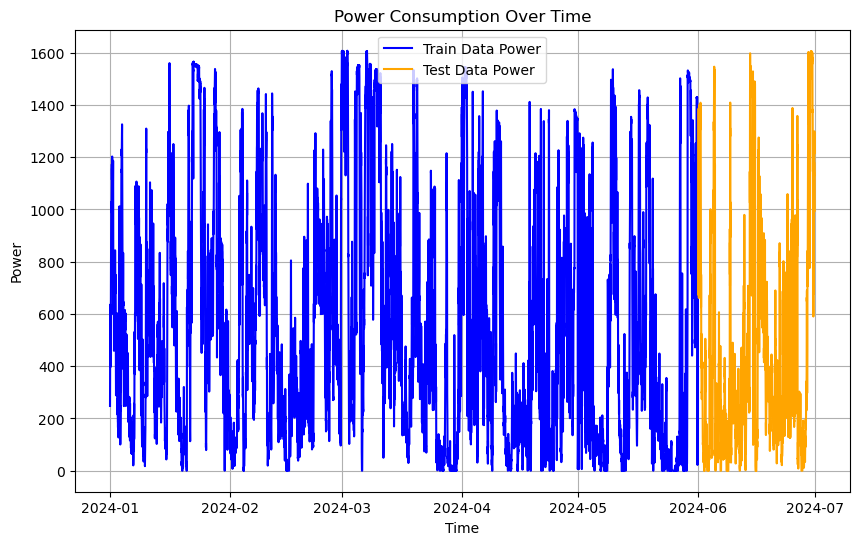

In [6]:
import matplotlib.pyplot as plt

# Convert 'time' column to DateTime objects
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])


plt.figure(figsize=(10, 6))  # Set the figure size

# Plot train_data['power'] with time as x-axis
plt.plot(train_data.time, train_data['power'], label='Train Data Power', color='blue')

# Plot test_data['power'] with time as x-axis
plt.plot(test_data.time, test_data['power'], label='Test Data Power', color='orange')

# Adding titles and labels
plt.title('Power Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Power')

# Adding a legend
plt.legend()

# Adding grid lines for better readability
plt.grid(True)

# Display the plot
plt.show()

In [7]:
# Convert 'time' column to DateTime objects
train_data['time'] = pd.to_datetime(train_data['time'])
test_data['time'] = pd.to_datetime(test_data['time'])

# Print start and end times for train_data
train_start_time = train_data['time'].min()
train_end_time = train_data['time'].max()
print(f"Train Data Start Time: {train_start_time}")
print(f"Train Data End Time: {train_end_time}")

# Print start and end times for test_data
test_start_time = test_data['time'].min()
test_end_time = test_data['time'].max()
print(f"Test Data Start Time: {test_start_time}")
print(f"Test Data End Time: {test_end_time}")

# Generate the expected time ranges with 15-minute intervals
train_expected_times = pd.date_range(start=train_start_time, end=train_end_time, freq='15T')
test_expected_times = pd.date_range(start=test_start_time, end=test_end_time, freq='15T')

# Check if the lengths match
train_data_correct_length = len(train_data) == len(train_expected_times)
test_data_correct_length = len(test_data) == len(test_expected_times)

print(f"Train Data Collected Every 15 Minutes: {train_data_correct_length}")
print(f"Test Data Collected Every 15 Minutes: {test_data_correct_length}")

Train Data Start Time: 2024-01-01 00:00:00
Train Data End Time: 2024-05-31 23:45:00
Test Data Start Time: 2024-06-01 00:00:00
Test Data End Time: 2024-06-30 23:45:00
Train Data Collected Every 15 Minutes: True
Test Data Collected Every 15 Minutes: True


/tmp/ipykernel_3484368/3098399696.py:18: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  train_expected_times = pd.date_range(start=train_start_time, end=train_end_time, freq='15T')
/tmp/ipykernel_3484368/3098399696.py:19: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  test_expected_times = pd.date_range(start=test_start_time, end=test_end_time, freq='15T')


In [8]:
# Check the nan values in the dataset
print(train_data.isnull().sum().sum())
print(test_data.isnull().sum().sum())

# check all the 'power' is non-negative
print(train_data[train_data["power"] < 0].shape[0])
print(test_data[test_data["power"] < 0].shape[0])

0
0
0
0


In [9]:
n_train = len(train_data["time"])
n_test = len(test_data["time"])

train_date_range = pd.date_range(
    start=train_data.time.min(), end=train_data.time.max(), freq="15T"
)

test_date_range = pd.date_range(
    start=test_data.time.min(), end=test_data.time.max(), freq="15T"
)

print(f"For train: {n_train} vs {len(train_date_range)}")
print(f"For test: {n_test} vs {len(test_date_range)}")

For train: 14592 vs 14592
For test: 2880 vs 2880


/tmp/ipykernel_3484368/1235129531.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  train_date_range = pd.date_range(
/tmp/ipykernel_3484368/1235129531.py:8: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  test_date_range = pd.date_range(


In [10]:
# Ignore 'time' and 'lead_hour' for cleaning
ignore_features = ["time", "lead_hour"]
features = [col for col in train_data.columns if col not in ignore_features + ["power"]]

In [11]:
# Select features with small variance
from sklearn.feature_selection import VarianceThreshold

# Step 1: Variance Threshold Filtering
selector = VarianceThreshold(threshold=0.1)  # Adjust the threshold as needed
train_data_variance_filtered = selector.fit_transform(train_data[features])
selected_variance_features = train_data[features].columns[selector.get_support()]

In [12]:
# Create new train and test data with selected features
train_data = train_data[
    ignore_features + selected_variance_features.tolist() + ["power"]
]
test_data = test_data[ignore_features + selected_variance_features.tolist() + ["power"]]

In [24]:
print(
    f"Selected Features has {len(selected_variance_features)}:\n",
    selected_variance_features,
)
print(f"Total num of feature is {len(train_data.columns)}")

Selected Features has 89:
 Index(['altitude', 'azimuth', 'u100', 'v100', 'fg10', 'u10', 'v10', 'u200',
       'v200', 'd2m', 't2m', 'bld', 'blh', 'cape', 'capes', 'cdir', 'deg0l',
       'degm10l', 'dsrp', 'ewss', 'fdir', 'flsr', 'gwd', 'hcc', 'hwbt0',
       'hwbt1', 'i10fg', 'ilspf', 'ishf', 'kx', 'lblt', 'lcc', 'lgws',
       'litoti', 'lmlt', 'lspf', 'ltlt', 'mcc', 'mgws', 'mlcape100',
       'mlcape50', 'mld', 'mn2t', 'msl', 'mucape', 'mudlp', 'mx2t', 'nsss',
       'parcs', 'par', 'totalx', 'skt', 'slhf', 'sp', 'sshf', 'ssrc', 'ssrdc',
       'ssrd', 'ssr', 'sst', 'stl1', 'stl2', 'stl3', 'stl4', 'strc', 'strdc',
       'strd', 'str', 'sund', 'tcc', 'tcsw', 'tcw', 'tcwv', 'tisr', 'trpp',
       'tsrc', 'tsr', 'ttrc', 'ttr', 'u10n', 'uvb', 'v10n', 'vimd', 'p3020',
       'viwve', 'viwvn', 'ws200', 'ws100', 'ws10'],
      dtype='object')
Total num of feature is 92


In [13]:
print(f'shape of train_data: {train_data.shape}, shape of test_data: {test_data.shape}')

shape of train_data: (14592, 92), shape of test_data: (2880, 92)


In [14]:
# Save the combined datasets to CSV files
train_data.to_csv(f"{data_dir}/" + "train_farm_92.csv", index=False)
test_data.to_csv(f"{data_dir}/" + "test_farm_92.csv", index=False)

print(
    "Combined train and test datasets have been saved to 'train_data.csv' and 'test_data.csv'."
)

Combined train and test datasets have been saved to 'train_data.csv' and 'test_data.csv'.


In [12]:
from prepare_data import WindPowerDataset

data_dir = "/data3/lsf/Pein/Power-Prediction/data"
train_ori = os.path.join(data_dir, "train_data.csv")
test_ori = os.path.join(data_dir, "test_data.csv")

# Parameters
seq_len = 2  # example sequence length

# Create datasets
train_dataset = WindPowerDataset(train_ori, seq_len)
test_dataset = WindPowerDataset(test_ori, seq_len)

ModuleNotFoundError: No module named 'prepare_data'

TypeError: 'DataFrame' object is not callable